In [ ]:
!pip install tflite-support

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Model
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
from google.colab import files
import pathlib

import flatbuffers
from tensorflow_lite_support.metadata import metadata_schema_py_generated as _metadata_fb
from tensorflow_lite_support.metadata.python import metadata as _metadata
from tensorflow_lite_support.metadata.python.metadata_writers import writer_utils

**Load Data**

In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Product Capstone/Development/ML/Image/archive.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
# Directory with and alphabet pictures
A_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/A')
B_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/B')
C_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/C')
D_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/D')
E_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/E')
F_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/F')
G_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/G')
H_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/H')
I_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/I')
J_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/J')
K_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/K')
L_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/L')
M_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/M')
N_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/N')
O_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/O')
P_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/P')
Q_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/Q')
R_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/R')
S_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/S')
T_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/T')
U_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/U')
V_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/V')
W_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/W')
X_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/X')
Y_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/Y')
Z_dir = os.path.join('/tmp/asl_alphabet_train/asl_alphabet_train/Z')

In [ ]:
alp_A = os.listdir(A_dir)
alp_B = os.listdir(B_dir)
alp_C = os.listdir(C_dir)
alp_D = os.listdir(D_dir)
alp_E = os.listdir(E_dir)
alp_F = os.listdir(F_dir)
alp_G = os.listdir(G_dir)
alp_H = os.listdir(H_dir)
alp_I = os.listdir(I_dir)
alp_J = os.listdir(J_dir)
alp_K = os.listdir(K_dir)
alp_L = os.listdir(L_dir)
alp_M = os.listdir(M_dir)
alp_N = os.listdir(N_dir)
alp_O = os.listdir(O_dir)
alp_P = os.listdir(P_dir)
alp_Q = os.listdir(Q_dir)
alp_R = os.listdir(R_dir)
alp_S = os.listdir(S_dir)
alp_T = os.listdir(T_dir)
alp_U = os.listdir(U_dir)
alp_V = os.listdir(V_dir)
alp_W = os.listdir(W_dir)
alp_X = os.listdir(X_dir)
alp_Y = os.listdir(Y_dir)
alp_Z = os.listdir(Z_dir)

In [ ]:
# Printing the first 10 items in each directory
print(f'A: {alp_A[:5]}')
print(f'B: {alp_B[:5]}')
print(f'C: {alp_C[:5]}')
print(f'D: {alp_D[:5]}')
print(f'E: {alp_E[:5]}')
print(f'F: {alp_F[:5]}')
print(f'G: {alp_G[:5]}')
print(f'H: {alp_H[:5]}')
print(f'I: {alp_I[:5]}')
print(f'J: {alp_J[:5]}')
print(f'K: {alp_K[:5]}')
print(f'L: {alp_L[:5]}')
print(f'M: {alp_M[:5]}')
print(f'N: {alp_N[:5]}')
print(f'O: {alp_O[:5]}')
print(f'P: {alp_P[:5]}')
print(f'Q: {alp_Q[:5]}')
print(f'R: {alp_R[:5]}')
print(f'S: {alp_S[:5]}')
print(f'T: {alp_T[:5]}')
print(f'U: {alp_U[:5]}')
print(f'V: {alp_V[:5]}')
print(f'W: {alp_W[:5]}')
print(f'X: {alp_X[:5]}')
print(f'Y: {alp_Y[:5]}')
print(f'Z: {alp_Z[:5]}')

A: ['A1943.jpg', 'A1229.jpg', 'A664.jpg', 'A2515.jpg', 'A1883.jpg']
B: ['B1422.jpg', 'B378.jpg', 'B748.jpg', 'B2185.jpg', 'B612.jpg']
C: ['C687.jpg', 'C1278.jpg', 'C794.jpg', 'C696.jpg', 'C2083.jpg']
D: ['D2983.jpg', 'D2756.jpg', 'D458.jpg', 'D2417.jpg', 'D2329.jpg']
E: ['E2844.jpg', 'E1159.jpg', 'E478.jpg', 'E106.jpg', 'E482.jpg']
F: ['F2470.jpg', 'F424.jpg', 'F1222.jpg', 'F319.jpg', 'F1748.jpg']
G: ['G2205.jpg', 'G2778.jpg', 'G2468.jpg', 'G194.jpg', 'G2791.jpg']
H: ['H2430.jpg', 'H717.jpg', 'H2941.jpg', 'H425.jpg', 'H2357.jpg']
I: ['I896.jpg', 'I615.jpg', 'I1923.jpg', 'I282.jpg', 'I885.jpg']
J: ['J1177.jpg', 'J1809.jpg', 'J2907.jpg', 'J2062.jpg', 'J76.jpg']
K: ['K880.jpg', 'K2230.jpg', 'K1131.jpg', 'K688.jpg', 'K1317.jpg']
L: ['L2894.jpg', 'L1443.jpg', 'L1474.jpg', 'L1977.jpg', 'L1005.jpg']
M: ['M2508.jpg', 'M328.jpg', 'M832.jpg', 'M2294.jpg', 'M1067.jpg']
N: ['N720.jpg', 'N2763.jpg', 'N961.jpg', 'N2615.jpg', 'N980.jpg']
O: ['O1098.jpg', 'O1611.jpg', 'O277.jpg', 'O2376.jpg', 'O437.jp

In [ ]:
del_path = '/tmp/asl_alphabet_train/asl_alphabet_train/del'
nothing_path = '/tmp/asl_alphabet_train/asl_alphabet_train/nothing'
space_path = '/tmp/asl_alphabet_train/asl_alphabet_train/space'

shutil.rmtree(del_path)
shutil.rmtree(nothing_path)
shutil.rmtree(space_path)

In [ ]:
# Concatenate paths to each directory
total_data = [
    A_dir, B_dir, C_dir, D_dir, E_dir, F_dir, G_dir, H_dir, I_dir, J_dir, K_dir, L_dir, M_dir,
    N_dir, O_dir, P_dir, Q_dir, R_dir, S_dir, T_dir, U_dir, V_dir, W_dir, X_dir, Y_dir, Z_dir
]

# Initialize the variable for the total number of images
total_images = 0

# Iterate through all directories and count the number of files
for total in total_data:
    total_images += len(os.listdir(total))

print(f'Total images: {total_images}')

Total images: 78000


**Split Data**

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Source directory where images are stored in subdirectories by label
source_dir = '/tmp/asl_alphabet_train/asl_alphabet_train'

# Destination directories to save training and validation images
train_dir = '/tmp/asl_alphabet_train/train'
val_dir = '/tmp/asl_alphabet_train/val'

# Create training and validation directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Get list of labels (subdirectories)
labels = [d for d in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, d))]

# Function to copy images to specified directory
def copy_images(image_list, destination_dir):
    for image, label in image_list:
        label_dir = os.path.join(destination_dir, label)
        os.makedirs(label_dir, exist_ok=True)
        shutil.copy(os.path.join(source_dir, label, image), os.path.join(label_dir, image))

# Process each label
for label in labels:
    label_dir = os.path.join(source_dir, label)
    all_images = [f for f in os.listdir(label_dir) if os.path.isfile(os.path.join(label_dir, f))]

    # Splitting image data into 80% for training and 20% for validation
    train_images, val_images = train_test_split(all_images, test_size=0.2, random_state=42)

    # Include label in list of images for copying
    train_images = [(img, label) for img in train_images]
    val_images = [(img, label) for img in val_images]

    # Copying images to training directory
    copy_images(train_images, train_dir)

    # Copying images to validation directory
    copy_images(val_images, val_dir)

# Display total images in each set
total_train_images = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val_images = sum([len(files) for r, d, files in os.walk(val_dir)])

# Display total images in each set
print(f"Number of training images: {total_train_images}")
print(f"Number of validation images: {total_val_images}")

Number of training images: 62400
Number of validation images: 15600


**Data Augmentation**

In [ ]:
# Image data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    color_mode='rgb'
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

# Check a few batches from the generators to ensure everything is working fine
for data_batch, labels_batch in train_generator:
    print("")
    print('Training data batch shape:', data_batch.shape)
    print('Training labels batch shape:', labels_batch.shape)
    print("")
    break

for data_batch, labels_batch in validation_generator:
    print('Validation data batch shape:', data_batch.shape)
    print('Validation labels batch shape:', labels_batch.shape)
    break

Found 62400 images belonging to 26 classes.
Found 15600 images belonging to 26 classes.

Training data batch shape: (32, 224, 224, 3)
Training labels batch shape: (32, 26)

Validation data batch shape: (32, 224, 224, 3)
Validation labels batch shape: (32, 26)


**Examine and Visualize Dataset**

In [ ]:
labels = list(train_generator.class_indices.keys())
print(labels)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


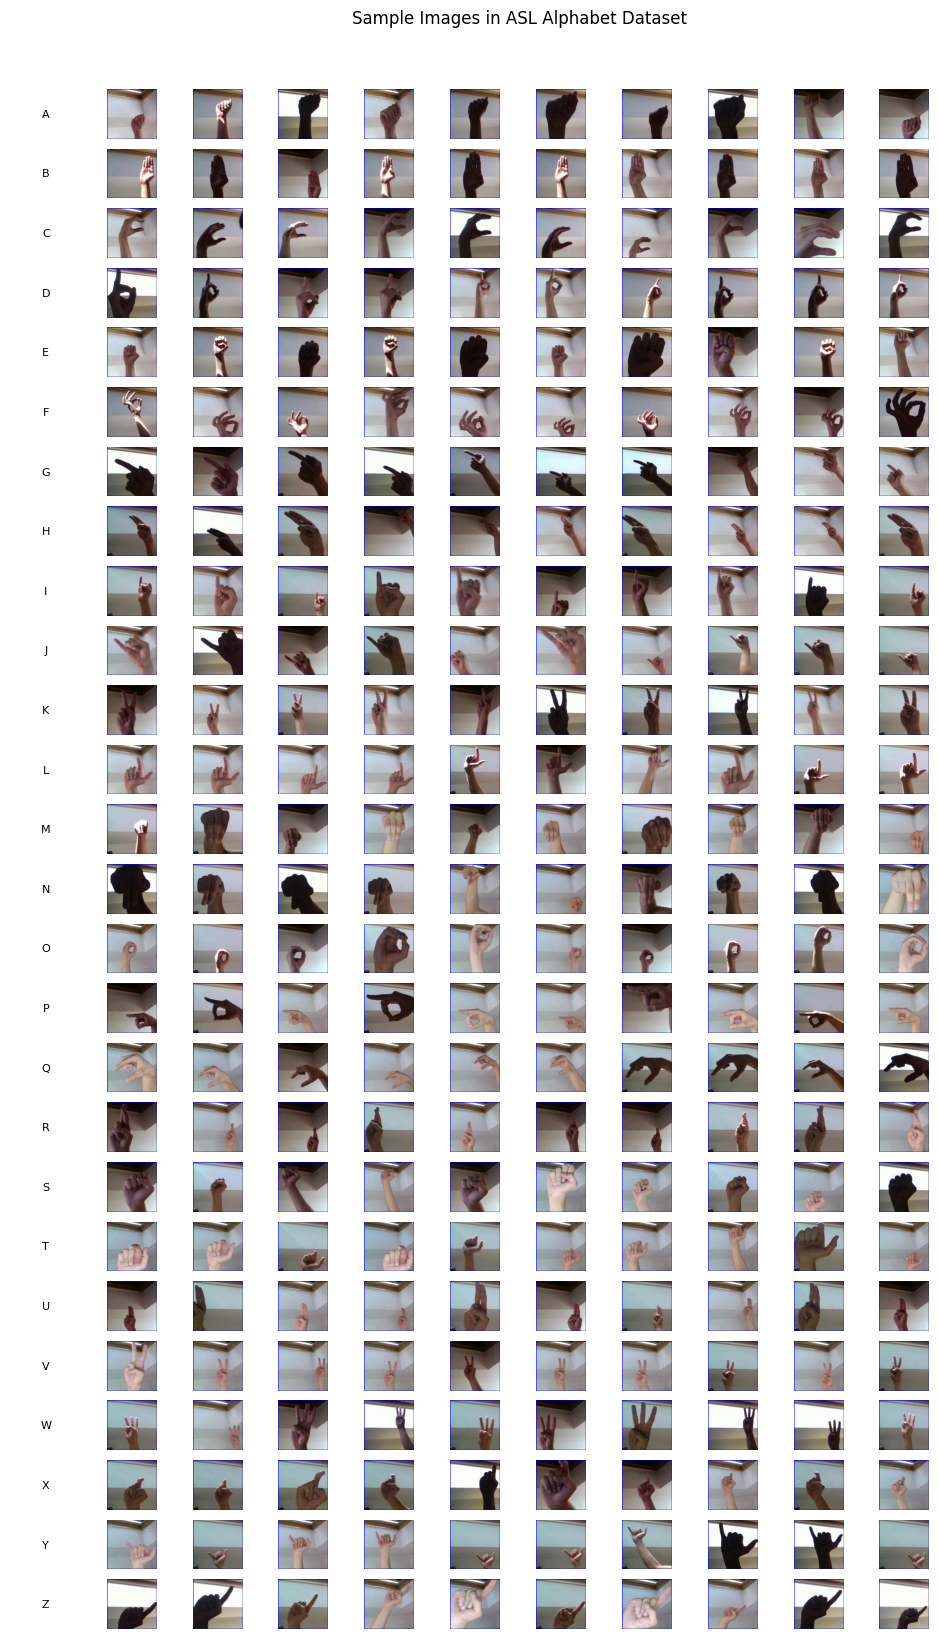

In [ ]:
def sample_images(labels):
    # Create Subplots
    y_size = 12
    if len(labels) < 10:
        y_size = y_size * len(labels) / 10
    fig, axs = plt.subplots(len(labels), 11, figsize=(y_size, 20))

    for i, label in enumerate(labels):
        axs[i, 0].text(0.5, 0.5, label, ha='center', va='center', fontsize=8)
        axs[i, 0].axis('off')

        label_path = os.path.join(train_dir, label)
        list_files = os.listdir(label_path)

        for j in range(10):
            img_label = cv2.imread(os.path.join(label_path, list_files[j]))
            img_label = cv2.cvtColor(img_label, cv2.COLOR_BGR2RGB)
            axs[i, j+1].imshow(img_label)
            axs[i, j+1].axis("off")

    # Title
    plt.suptitle("Sample Images in ASL Alphabet Dataset", x=0.55, y=0.92)

    # Show
    plt.show()

# Example usage
sample_images(labels[:26])

**CREATE MODEL**

In [ ]:
# Load pretrained MobileNetV2 model without the top classification layer
pretrainedModel = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
pretrainedModel.trainable = False

inputs = pretrainedModel.input

# Add new classification layers
x = tf.keras.layers.GlobalAveragePooling2D()(pretrainedModel.output)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(512, activation=tf.nn.relu)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)

# Output layer: A-Z
outputs = tf.keras.layers.Dense(26, activation='softmax')(x)

# Create the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=optimizer_adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.99 or logs.get('val_accuracy') > 0.98):
            print("\n Accuracy is more than 98%, stopping...")
            self.model.stop_training = True

callback = myCallback()

checkpoint_filepath = '/tmp/ckpt/checkpoint.weights.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[callback]
 )

Epoch 1/50
1950/1950 [==============================] - 702s 356ms/step - loss: 0.7328 - accuracy: 0.7754 - val_loss: 0.2072 - val_accuracy: 0.9321
Epoch 2/50
1950/1950 [==============================] - 700s 359ms/step - loss: 0.4180 - accuracy: 0.8660 - val_loss: 0.1631 - val_accuracy: 0.9442
Epoch 3/50
1950/1950 [==============================] - 694s 356ms/step - loss: 0.3490 - accuracy: 0.8869 - val_loss: 0.1286 - val_accuracy: 0.9571
Epoch 4/50
1950/1950 [==============================] - 693s 356ms/step - loss: 0.3066 - accuracy: 0.9000 - val_loss: 0.1182 - val_accuracy: 0.9601
Epoch 5/50
1950/1950 [==============================] - 695s 357ms/step - loss: 0.2770 - accuracy: 0.9105 - val_loss: 0.0889 - val_accuracy: 0.9691
Epoch 6/50
1950/1950 [==============================] - 705s 361ms/step - loss: 0.2546 - accuracy: 0.9172 - val_loss: 0.0646 - val_accuracy: 0.9795
Epoch 7/50
1950/1950 [==============================] - 695s 356ms/step - loss: 0.2376 - accuracy: 0.9216 - val_

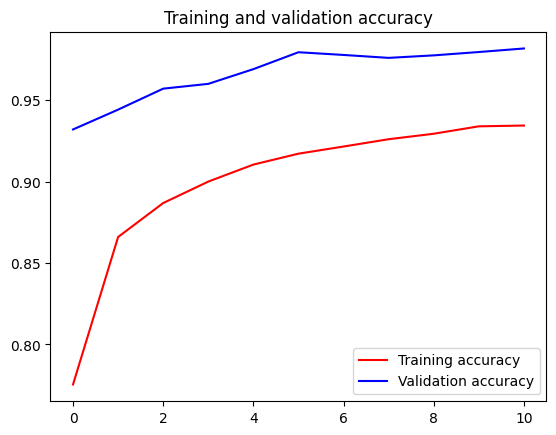

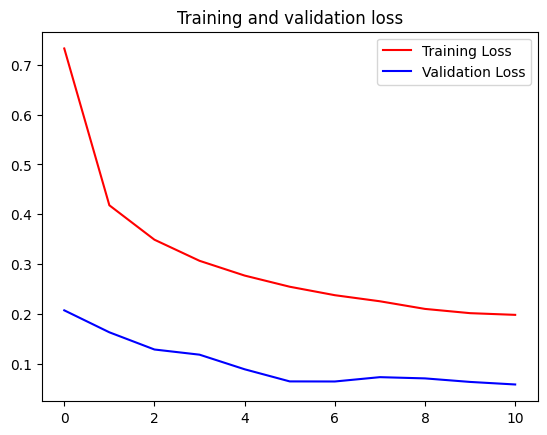

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
input_shape = model.input_shape
output_shape = model.output_shape

print("Input shape:", input_shape)
print("Output shape:", output_shape)

Input shape: (None, 224, 224, 3)
Output shape: (None, 26)


Save zip model.h5

In [ ]:
export_dir = '/content/model'
tf.saved_model.save(model, export_dir)

In [ ]:
with open('label.txt', 'w') as f:
    for label in train_generator.class_indices:
        f.write(label + '\n')

In [ ]:
!zip -r /content/model.zip /content/model

  adding: content/model/ (stored 0%)
  adding: content/model/saved_model.pb (deflated 91%)
  adding: content/model/assets/ (stored 0%)
  adding: content/model/variables/ (stored 0%)
  adding: content/model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/model/variables/variables.index (deflated 77%)
  adding: content/model/fingerprint.pb (stored 0%)


Convert model.h5 to model.tflite

In [137]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [138]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

11758724

Adding Metadata

In [131]:
def create_metadata():
    model_meta = _metadata_fb.ModelMetadataT()
    model_meta.name = "ASL Alphabet Classifier"
    model_meta.description = "Identify ASL alphabet letters."
    model_meta.version = "v1"
    model_meta.author = "Gesturo"
    model_meta.license = " "

    # Add input info
    input_meta = _metadata_fb.TensorMetadataT()
    input_meta.name = "Input Image"
    input_meta.description = "Input image to be classified."
    input_meta.content = _metadata_fb.ContentT()
    input_meta.content.contentProperties = _metadata_fb.ImagePropertiesT()
    input_meta.content.contentProperties.colorSpace = _metadata_fb.ColorSpaceType.RGB  # RGB color space
    input_meta.content.contentPropertiesType = _metadata_fb.ContentProperties.ImageProperties
    input_meta.content.range = _metadata_fb.ValueRangeT()
    input_meta.content.range.min = 0
    input_meta.content.range.max = 255
    input_meta.content.stats = _metadata_fb.StatsT()
    input_meta.content.stats.max = [255.0]
    input_meta.content.stats.min = [0.0]
    input_meta.content.shape = [1, 224, 224, 3]  # input shape

    # Add output info
    output_meta = _metadata_fb.TensorMetadataT()
    output_meta.name = "Predicted Class"
    output_meta.description = "The predicted class for the input image."
    output_meta.content = _metadata_fb.ContentT()
    output_meta.content.contentProperties = _metadata_fb.FeaturePropertiesT()
    output_meta.content.range = _metadata_fb.ValueRangeT()
    output_meta.content.range.min = 0
    output_meta.content.range.max = 25  # number of classes (A-Z)
    label_file = _metadata_fb.AssociatedFileT()
    label_file.name = os.path.basename("/content/label.txt")
    label_file.description = "Label of objects that this model can recognize."
    label_file.type = _metadata_fb.AssociatedFileType.TENSOR_VALUE_LABELS
    output_meta.associatedFiles = [label_file]

    # Creates subgraph info.
    group = _metadata_fb.TensorGroupT()
    group.name = "detection result"
    group.tensorNames = [output_meta.name]
    subgraph = _metadata_fb.SubGraphMetadataT()
    subgraph.inputTensorMetadata = [input_meta]
    subgraph.outputTensorMetadata = [output_meta]
    subgraph.outputTensorGroups = [group]
    model_meta.subgraphMetadata = [subgraph]

    b = flatbuffers.Builder(0)
    b.Finish(
        model_meta.Pack(b),
        _metadata.MetadataPopulator.METADATA_FILE_IDENTIFIER)
    metadata_buf = b.Output()

    return metadata_buf

# Buat metadata
metadata_buf = create_metadata()

# Simpan metadata ke file
metadata_file = "/content/model_metadata.tflite"
with open(metadata_file, "wb") as f:
    f.write(metadata_buf)

In [139]:
populator = _metadata.MetadataPopulator.with_model_file("/content/model.tflite")
populator.load_metadata_buffer(metadata_buf)
populator.load_associated_files(["/content/label.txt"])
populator.populate()